In [102]:
import pandas as pd
import numpy as np

# датасет с ценами на товары
df_price = pd.read_csv("item_prices.csv")
df_price


,item_id,item_price
0,338,1501
1,74,647
2,7696,825
3,866,875
4,5876,804
...,...,...
995,3463,1300
996,1573,716
997,610,1748
998,4452,386


In [ ]:
# датасеты с просмотрами,кликами,покупками для пользователей в разных группах A,B,C
df_a = pd.read_csv("sample_a.csv")
df_b = pd.read_csv("sample_b.csv")
df_c = pd.read_csv("sample_c.csv")
df_price.head()

In [15]:
df_a.sample(10)

,user_id,item_id,action_id
521076,17562,1452,1
255941,25459,9500,1
488192,66775,3722,1
110459,47414,569,1
25673,17562,8048,1
1123912,8568,9140,1
621791,15956,9242,1
427431,51838,467,1
805782,80913,1062,0
961221,18854,3345,1


In [16]:
df_b.sample(10)

,user_id,item_id,action_id
869177,135562,3602,1
233197,183355,2698,2
920299,167307,5924,1
509471,168733,8117,1
775225,161423,4171,1
924679,187876,7317,1
575370,123251,7194,1
475111,196642,2066,1
200065,106247,36,1
204901,135417,3037,1


In [17]:
df_c.sample(10)

,user_id,item_id,action_id
808958,251686,4949,1
1176512,241133,5751,1
1025507,242381,6917,1
393760,222295,8516,1
331290,236709,6390,1
55563,280613,3555,2
717077,293521,3482,1
1112069,231855,9850,2
285719,221533,8505,1
71048,200743,8688,1


In [2]:
# подготовка датасета для дальнейшего добавления новых признаков
# Установка порядка категорий для action_id
df_a['action_id_cat'] = pd.Categorical(df_a['action_id'], categories=[1, 0, 2], ordered=True)

# Сортировка датасета
df_sorted = df_a.sort_values(['user_id', 'item_id', 'action_id_cat'])

# Вывод отсортированного датасета
df_sorted

,user_id,item_id,action_id,action_id_cat
1158951,241,21,1,1
800805,241,36,1,1
826737,241,39,1,1
102557,241,50,1,1
17980,241,64,1,1
...,...,...,...,...
582512,99880,9936,1,1
592350,99880,9944,1,1
521903,99880,9958,1,1
845904,99880,9989,1,1


In [3]:
# по числу рядов видно, что дубликатов не присутствует
df_sorted.drop_duplicates()

,user_id,item_id,action_id,action_id_cat
1158951,241,21,1,1
800805,241,36,1,1
826737,241,39,1,1
102557,241,50,1,1
17980,241,64,1,1
...,...,...,...,...
582512,99880,9936,1,1
592350,99880,9944,1,1
521903,99880,9958,1,1
845904,99880,9989,1,1


In [4]:
import itertools

# типы действий пользователей отсортированы в прядке просмотр,клик, покупка [1,0,2]
# на основании этого выполняется проверка, что нет покупки без клика или клика без просмотра

# Группировка датасета
df_grouped = df_sorted.groupby(['user_id', 'item_id'])

# тестовый просмотр, что есть некорректные записи
# Выбор первых групп, чтобы(для скорости) не экспериментировать на всем датасете
df_ = list(itertools.islice(df_grouped, 300))
def qqla(x,isdebug=False):
    li=list(x['action_id'].values)
    if len(li) == 3 and li[2]==2 :return True #нет  покупки без двух предыдущих действий (1,0)
    elif len(li) == 2 and li[1]==0:return True #нет клика без одного предыдущего действия (1)
    elif len(li) == 1 and li[0]==1:return True #одно действие - только просмотр (1)
    else: #все другие комбинации ошибочны, удалить эти ряды
        if isdebug:print(li,x.iloc[0]['user_id'])
        return False
# Вывод структуры для первых групп
for i, group in enumerate(df_):
    df_filtered = group[1].groupby(['user_id', 'item_id']).filter(lambda x: qqla(x, isdebug=True))


[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241
[1, 2] 241


In [ ]:
# т.е. есть такие, где присутствует покупка без клика, надо их отфильтровать

In [5]:
# Фильтрация датасета A
df_filtered = df_sorted.groupby(['user_id', 'item_id']).filter(lambda x: qqla(x))

# Вывод отфильтрованного датасета
print(df_filtered)

         user_id  item_id  action_id action_id_cat
1158951      241       21          1             1
800805       241       36          1             1
826737       241       39          1             1
102557       241       50          1             1
17980        241       64          1             1
...          ...      ...        ...           ...
582512     99880     9936          1             1
592350     99880     9944          1             1
521903     99880     9958          1             1
845904     99880     9989          1             1
748940     99880     9994          1             1

[1112820 rows x 4 columns]


In [6]:
# выполнить аналогичные приготовления для двух других датасетов B,C
df_b['action_id_cat'] = pd.Categorical(df_b['action_id'], categories=[1, 0, 2], ordered=True)
df_c['action_id_cat'] = pd.Categorical(df_c['action_id'], categories=[1, 0, 2], ordered=True)
df_sorted = df_b.sort_values(['user_id', 'item_id', 'action_id_cat'])
df_b = df_sorted.groupby(['user_id', 'item_id']).filter(lambda x: qqla(x))
df_sorted = df_c.sort_values(['user_id', 'item_id', 'action_id_cat'])
df_c = df_sorted.groupby(['user_id', 'item_id']).filter(lambda x: qqla(x))

Metrics for dataset A:
 1    913084
0    190226
2      9510
Name: action_id, dtype: int64
Metrics for dataset C:
 1    904211
0    199336
2     11943
Name: action_id, dtype: int64
Shapiro-Wilk test for dataset A: 0.8928579688072205 0.3631146550178528
Shapiro-Wilk test for dataset C: 0.8991844654083252 0.3829094469547272
T-statistic: -0.002298082889212599
P-value: 0.9982764397294318


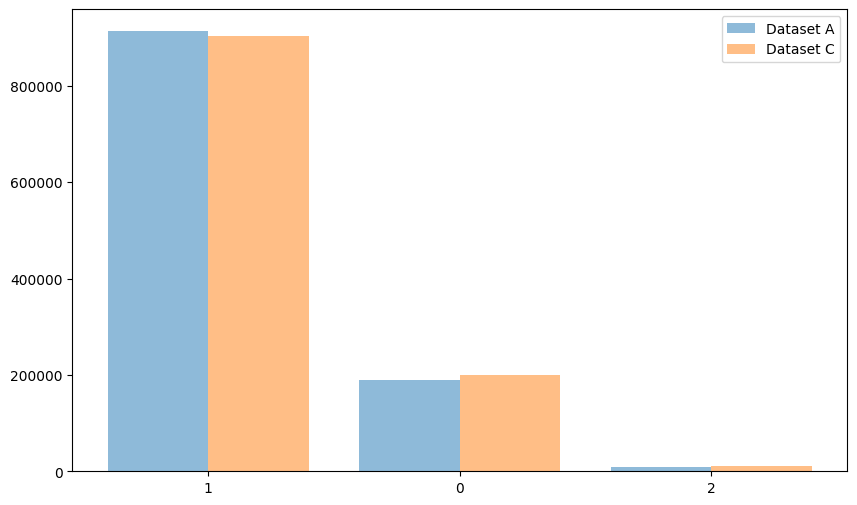

In [7]:
df_a=df_filtered
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import matplotlib.pyplot as plt
# Подсчет метрик по существующим признакам просмотров/кликов/покупок для каждого датасета
metrics_a = df_a['action_id'].value_counts()
metrics_c = df_c['action_id'].value_counts()
metrics_b = df_b['action_id'].value_counts()

# Вывод метрик
print('Metrics for dataset A:\n', metrics_a)
print('Metrics for dataset C:\n', metrics_c)

# Проверка нормальности распределения
stat_a, p_val_a = shapiro(metrics_a)
stat_c, p_val_c = shapiro(metrics_c)

print('Shapiro-Wilk test for dataset A:', stat_a, p_val_a)
print('Shapiro-Wilk test for dataset C:', stat_c, p_val_c)

# Проведение А/А теста, если данные нормально распределены
if p_val_a > 0.01 and p_val_c > 0.01:
    t_stat, p_val = ttest_ind(metrics_a, metrics_c)
    print('T-statistic:', t_stat)
    print('P-value:', p_val)
else:
    print('Data is not normally distributed, cannot perform t-test')

# Построение диаграммы распределения
plt.figure(figsize=(10, 6))
# Создание массива для позиций баров
positions = np.arange(len(metrics_a))

# Построение баров для датасета A
plt.bar(positions, metrics_a, width=0.4, alpha=0.5, label='Dataset A')

# Построение баров для датасета C
plt.bar(positions + 0.4, metrics_c, width=0.4, alpha=0.5, label='Dataset C')

plt.xticks(positions + 0.2, metrics_a.index)
plt.legend(loc='upper right')
plt.show()

In [8]:
# Shapiro-Wilk тест показывает p-value более 0.01, т.е. данные в датасетах a,c соответствуют нормальному 
# распределению и можно выполнять t-test

# t-test показывает, что p-value равен 0.99, значит нельзя отвергнуть нулевую гипотезу, что средние значения
# двух датасетов совпадают. 
# Вывод по A/A тесту: датасет корректно разделен на две абсолютно равноценные группы и можно выполнять A/B тест.
# т.е. разъезжания сплитов на датасеты a,c не наблюдается

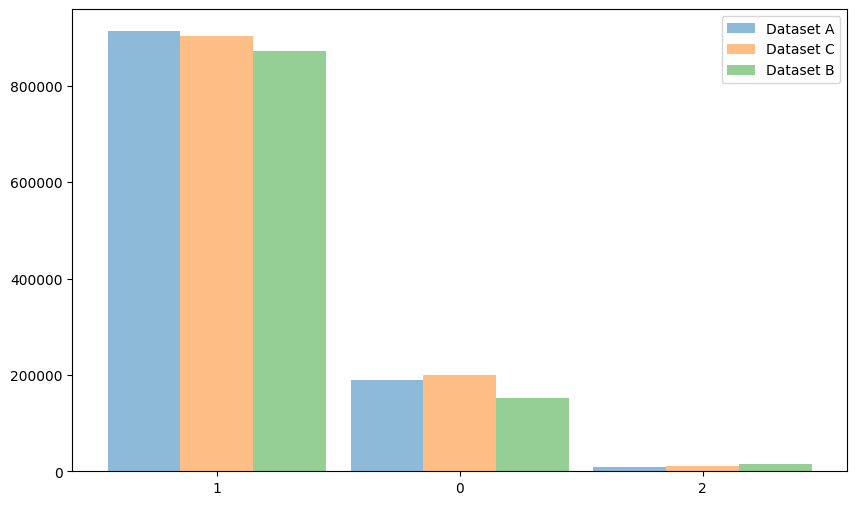

In [9]:
# Построение диаграммы распределения всех трех сетов для визуального сравнения
plt.figure(figsize=(10, 6))
# Создание массива для позиций баров
positions = np.arange(len(metrics_a))

# Построение баров для датасета A
plt.bar(positions, metrics_a, width=0.3, alpha=0.5, label='Dataset A')

# Построение баров для датасета C
plt.bar(positions + 0.3, metrics_c, width=0.3, alpha=0.5, label='Dataset C')
# Построение баров для датасета C
plt.bar(positions + 0.6, metrics_b, width=0.3, alpha=0.5, label='Dataset B')

plt.xticks(positions + 0.3, metrics_a.index)
plt.legend(loc='upper right')
plt.show()

CTR for dataset B: 0.17468084471410894
Purchase Rate for dataset B: 0.017422974589247547
GMV for dataset B: 17013290
CTR for dataset C: 0.22045296949495194
Purchase Rate for dataset C: 0.013208200298381684
GMV for dataset C: 13330484
CTR for dataset A: 0.20833351586491494
Purchase Rate for dataset A: 0.010415252046909157
GMV for dataset A: 10681225


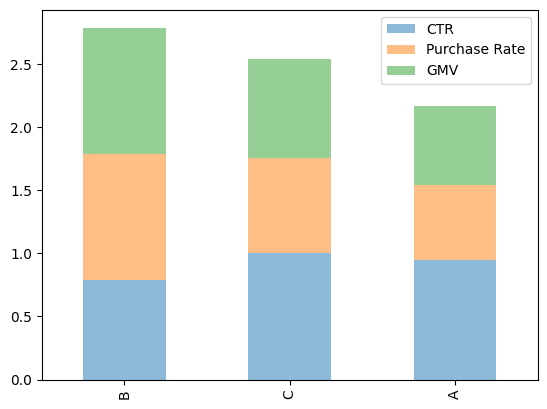

In [11]:
datasets = [df_b, df_c, df_a]
dataset_names = ['B', 'C', 'A']
metrics = []
for df, name in zip(datasets, dataset_names):
    # Вычисление CTR
    ctr = df[df['action_id'] == 0].shape[0] / df[df['action_id'] == 1].shape[0]
    
    # Вычисление Purchase Rate
    purchase_rate = df[df['action_id'] == 2].shape[0] / df[df['action_id'] == 1].shape[0]
    
    # Вычисление GMV
    # отфильтровать только сессии с покупками
    df_filtered = df[df['action_id']==2]
    # Объединение датасетов по item_id
    merged_df = pd.merge(df_filtered, df_price, on='item_id')

    # Вычисление суммы по полю item_price
    gmv  = merged_df['item_price'].sum()    
    
    # Вывод результатов
    print(f'CTR for dataset {name}:', ctr)
    print(f'Purchase Rate for dataset {name}:', purchase_rate)
    print(f'GMV for dataset {name}:', gmv)
    metrics.append([ctr, purchase_rate, gmv])

metrics_np = np.array(metrics)

# Нахождение максимальных значений во всех столбцах
max_values = np.max(metrics_np, axis=0)

# Нормализация каждого столбца по максимальному значению в этом столбце
metrics_np = metrics_np / max_values
metrics_df = pd.DataFrame(metrics_np, columns=['CTR', 'Purchase Rate', 'GMV'], index=dataset_names)
metrics_df.plot(kind='bar', stacked=True, alpha=0.5)
plt.show()

здесь выполнено вычисление "суммарных" метрик - имеют ли такие смысл???
по диаграмме можно сказать, что просмотров (при внедрении алгоритме B) стало меньше, 
зато стало больше кликов и покупок
можно предположить, что изменилась выдача по запросу, которая исключила лишние просмотры, тем самым более
точно выполняется запрос.

In [52]:
# на более поздних шагах обнаружилось, что база цен имеет неуникальные идентификаторы
# кстати,в пачке об этом написали 18 июня 2023 года и вроде отдали на исправление. а воз и ныне там. сегодня 26 января 2024
df_price['item_id'].value_counts().sort_values()

9775    1
2645    1
9433    1
7341    1
5929    1
       ..
4104    2
4220    2
5556    2
8581    3
338     3
Name: item_id, Length: 955, dtype: int64

In [58]:
duplicates = df_price[df_price['item_id'].duplicated(keep=False)].sort_values(by='item_id')
print(duplicates)
# на один товар есть несколько цен - что это означает? цена изменилась в процессе сбора данных,
# но нет информации по дате покупок, поэтому мы не можем использовать разные цены.


     item_id  item_price
0        338        1501
797      338        1151
977      338        1047
910      533         294
124      533         547
..       ...         ...
27      8679         356
637     8871         708
355     8871        1449
243     9068         663
940     9068         651

[88 rows x 2 columns]


In [63]:
# как вариант, можно взять среднюю цену и оставить это уникальное значение в базе цен
df_price=df_price.groupby('item_id').mean().reset_index()
df_price

,item_id,item_price
0,21,452.0
1,36,282.0
2,39,1746.0
3,50,871.0
4,64,1479.0
...,...,...
950,9936,379.0
951,9944,810.0
952,9958,265.0
953,9989,479.0


In [72]:
# подготовка для вычисления метрик маркетплейса по отдельным пользователям.
def review(x, isdebug=False):
    # количество просмотров на одного пользователя
    return len(x[x==1].index)
def click(x, isdebug=False):
    # количество кликов на одного пользователя
    return len(x[x==0].index)
def buy(x, isdebug=False):
    # количество покупок на одного пользователя
    return len(x[x==2].index)
def sumprice(x, isdebug=False):
    #  суммарная стоимость покупок на одного пользователя
    xx=x[x['action_id']==2].item_id
    total_price =xx.map(df_price.set_index('item_id')['item_price']).sum()
    return total_price

# далее выполняются тестовые проверки не над полным(для скорости) датасетом
df_grouped = df_a.groupby(['user_id'])
df_ = list(itertools.islice(df_grouped, 2)) #только две первые группы

cnt=0
for i, group in enumerate(df_):
    df_filtered1 = group[1].groupby(['user_id']).agg({'action_id': [review, click,buy]})
    df_filtered1["ctr"]=df_filtered1[("action_id","click")]/df_filtered1[("action_id","review")]
    df_filtered1["purch_rate"]=df_filtered1[("action_id","buy")]/df_filtered1[("action_id","review")]
    df_filteredgmv=group[1].groupby(['user_id']).apply(lambda x: sumprice(x))
    print(f'{df_filtered1}')
    print(f'{df_filteredgmv}')
# после выбора кода выполняется операция над полными датасетами

        action_id                 ctr purch_rate
           review click buy                     
user_id                                         
241           918   179  10  0.194989   0.010893
user_id
241    8153.0
dtype: float64
        action_id                 ctr purch_rate
           review click buy                     
user_id                                         
253           923   192   5  0.208017   0.005417
user_id
253    4848.0
dtype: float64


In [83]:
# далее вычисление метрик по отдельным пользователям.
datasets = [df_b, df_c, df_a]
dataset_names = ['B', 'C', 'A']
df_res=[]
# datasets = [df_b]
# dataset_names = ['B']
# metrics = []
tmp=None
for i, (df, name) in enumerate(zip(datasets, dataset_names)):
    df_res.append(df.groupby(['user_id']).agg({'action_id': [review, click,buy]}))
    # Вычисление CTR
    df_res[i]["ctr"]=df_res[i][("action_id","click")]/df_res[i][("action_id","review")]
    # Вычисление Purchase Rate
    df_res[i]["purch_rate"]=df_res[i][("action_id","buy")]/df_res[i][("action_id","review")]
    # Вычисление GMV
    tmp=df.groupby(['user_id']).apply(lambda x: sumprice(x))

    # соединить два датасета(датафрейм df_res[i] и сериес tmp) по индексу user_id
    tmp.name = 'GMV'
    result = df_res[i].join(tmp, how='outer')
    # переименовать столбцы, которые в результате группировки получили многоэтажные имена
    df_res[i] = result.rename(columns={
        ('action_id', 'review'): 'review',
        ('action_id', 'click'): 'click',
        ('action_id', 'buy'): 'buy',
        ('ctr', ''): 'ctr',
        ('purch_rate', ''): 'purch_rate',
    })

    print(f'{dataset_names[i]}:\n{df_res[i].head()}')


C:\Users\v.volkov\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


B:
         review  click  buy       ctr  purch_rate      GMV
user_id                                                   
100038      874    167   19  0.191076    0.021739  19120.0
100099      859    161   23  0.187427    0.026775  21487.5
100164      865    140    8  0.161850    0.009249   7228.0
100321      877    180   18  0.205245    0.020525  19164.0
100397      891    153   17  0.171717    0.019080  14964.0


C:\Users\v.volkov\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


C:
         review  click  buy       ctr  purch_rate           GMV
user_id                                                        
200225      919    196   13  0.213275    0.014146  15503.000000
200278      908    203   11  0.223568    0.012115  11956.666667
200282      901    209   16  0.231964    0.017758  19644.500000
200325      921    185   10  0.200869    0.010858  10261.000000
200441      913    202    8  0.221249    0.008762   8550.000000
A:
         review  click  buy       ctr  purch_rate     GMV
user_id                                                  
241         918    179   10  0.194989    0.010893  8153.0
253         923    192    5  0.208017    0.005417  4848.0
362         913    178    8  0.194962    0.008762  8118.0
378         912    195    8  0.213816    0.008772  9197.0
475         912    197    7  0.216009    0.007675  6455.0


C:\Users\v.volkov\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


In [86]:
# Проверка на нормальность производных признаков 'ctr','purch_rate','GMV' - метрик маркетплейса
fiatures=['ctr','purch_rate','GMV']
for i, (df, name) in enumerate(zip(df_res, dataset_names)):
    print(f'{dataset_names[i]}')
    for j,fi in enumerate(fiatures):
        shapiro_test = shapiro(df[fi])
        print(f"{fi} Statistics={shapiro_test[0]:.3f}, p={shapiro_test[1]:.3f}")

        alpha = 0.01
        if shapiro_test[1] > alpha: # если p больше alpha, то данные считаются нормально распределенными
            print("Data looks Gaussian (fail to reject H0)")
        else:
            print("Data does not look Gaussian (reject H0)")

B
ctr Statistics=0.998, p=0.339
Data looks Gaussian (fail to reject H0)
purch_rate Statistics=0.996, p=0.015
Data looks Gaussian (fail to reject H0)
GMV Statistics=0.995, p=0.004
Data does not look Gaussian (reject H0)
C
ctr Statistics=0.999, p=0.699
Data looks Gaussian (fail to reject H0)
purch_rate Statistics=0.992, p=0.000
Data does not look Gaussian (reject H0)
GMV Statistics=0.992, p=0.000
Data does not look Gaussian (reject H0)
A
ctr Statistics=0.997, p=0.119
Data looks Gaussian (fail to reject H0)
purch_rate Statistics=0.987, p=0.000
Data does not look Gaussian (reject H0)
GMV Statistics=0.990, p=0.000
Data does not look Gaussian (reject H0)


ctr для датасета Б,С,А имеют нормальное распределение

purch_rate для датасета Б имеют нормальное распределение С,А не имеют нормального распределения 

gmv для датасета Б,С,А не имеют нормального распределения


# Сравнение по признаку 'ctr'

In [88]:
# Сравнение дисперсии для признака 'ctr'
dispB = df_res[0]['ctr'].var()
dispC = df_res[1]['ctr'].var()
dispA = df_res[2]['ctr'].var()

print(f"Dispersion for 'ctr' in dataset B: {dispB}")
print(f"Dispersion for 'ctr' in dataset C: {dispC}")
print(f"Dispersion for 'ctr' in dataset A: {dispA}")
# дисперсия B,C,A немного разная, можно применить ttest вместо ztest

Dispersion for 'ctr' in dataset B: 0.00017588677718358492
Dispersion for 'ctr' in dataset C: 0.00017175529129627985
Dispersion for 'ctr' in dataset A: 0.00018269727020631831


In [89]:
group1 = df_res[0]['ctr']
group2 = df_res[1]['ctr']
group3 = df_res[2]['ctr']

# Сравнение B и C
t_stat1, p_val1 = ttest_ind(group1, group2)
print(f"Comparison between B and C:")
print(f"t-statistic: {t_stat1:.3f}")
print(f"p-value: {p_val1:.3f}")

# Сравнение C и A
t_stat3, p_val3 = ttest_ind(group2, group3)
print(f"\nComparison between C and A:")
print(f"t-statistic: {t_stat3:.3f}")
print(f"p-value: {p_val3:.3f}")

Comparison between B and C:
t-statistic: -77.430
p-value: 0.000

Comparison between C and A:
t-statistic: 20.304
p-value: 0.000


Вывод по ctr: есть статистически значимые различия, как для B,C, так и для C,A.
среднее для B меньше, чем для C, т.е. алгоритм "уменьшил" количество кликов на выдаче,
(этот же вывод был сделан и раньше) по исходным данным.
так же можно сказать, что для производных признаков (ctr) получилась разница для наборов C,A,
которая может свидетельствовать о плохом сплите данных при подготовке к AB тесту?????

# Сравнение по признаку 'purch_rate'

In [101]:
from scipy.stats import mannwhitneyu
# выполняется по тесту Манна-Уитни, т.к. одна или более признаков в паре сравниваемых групп имеет ненормальное распределение
groupB = df_res[0]['purch_rate']
groupC = df_res[1]['purch_rate']
groupA = df_res[2]['purch_rate']
# Сравнение groupB и groupC
u_stat1, p_val1 = mannwhitneyu(groupB, groupC)
print(f"Comparison between groupB and groupC:")
print(f"U-statistic: {u_stat1}")
print(f"p-value: {p_val1:.3f}")
print(f"среднее B,C: {np.mean(groupB):.3f} {np.mean(groupC):.3f}")
print(f"медиана B,C: {np.median(groupB):.3f} {np.median(groupC):.3f}")
# Сравнение groupC и groupA
u_stat3, p_val3 = mannwhitneyu(groupC, groupA)
print(f"\nComparison between groupC and groupA:")
print(f"U-statistic: {u_stat3}")
print(f"p-value: {p_val3:.3f}")
print(f"среднее C,A: {np.mean(groupC):.3f} {np.mean(groupA):.3f}")
print(f"медиана C,A: {np.median(groupC):.3f} {np.median(groupA):.3f}")


Comparison between groupB and groupC:
U-statistic: 751396.5
p-value: 0.000
среднее B,C: 0.017 0.013
медиана B,C: 0.017 0.013

Comparison between groupC and groupA:
U-statistic: 714947.0
p-value: 0.000
среднее C,A: 0.013 0.010
медиана C,A: 0.013 0.010


вывод для признака purch_rate: тест Манна-Уитни показывает статистически значимое 
различие в значениях признаков,как B,C, так и для C,A,
так же следует, что медианное значение признака для датасета B выше, чем для C, 
т.е. алгоритм повысил количество покупок из выдачи

# Сравнение по признаку 'gmv'

In [100]:
# выполняется по тесту Манна-Уитни, т.к. одна или более признаков в паре сравниваемых групп имеет ненормальное распределение
groupB = df_res[0]['GMV']
groupC = df_res[1]['GMV']
groupA = df_res[2]['GMV']
# Сравнение groupB и groupC
u_stat1, p_val1 = mannwhitneyu(groupB, groupC)
print(f"Comparison between groupB and groupC:")
print(f"U-statistic: {u_stat1}")
print(f"p-value: {p_val1:.3f}")

print(f"среднее B,C: {np.mean(groupB):.3f} {np.mean(groupC):.3f}")
print(f"медиана B,C: {np.median(groupB):.3f} {np.median(groupC):.3f}")
# Сравнение groupC и groupA
u_stat3, p_val3 = mannwhitneyu(groupC, groupA)
print(f"\nComparison between groupC and groupA:")
print(f"U-statistic: {u_stat3}")
print(f"p-value: {p_val3:.3f}")
print(f"среднее C,A: {np.mean(groupC):.3f} {np.mean(groupA):.3f}")
print(f"медиана C,A: {np.median(groupC):.3f} {np.median(groupA):.3f}")


Comparison between groupB and groupC:
U-statistic: 707563.5
p-value: 0.000
среднее B,C: 16371.020 12825.272
медиана B,C: 16391.750 12556.750

Comparison between groupC and groupA:
U-statistic: 665825.0
p-value: 0.000
среднее C,A: 12825.272 10313.256
медиана C,A: 12556.750 9913.750


вывод для признака GMV: тест Манна-Уитни показывает статистически значимое 
различие в значениях признаков,как B,C, так и для C,A,
так же следует, что медианное значение признака для датасета B выше, чем для C, 
т.е. алгоритм повысил оборот (сумму покупок)
различие для C,A указывает на плохой сплит при подготовке к AB тесту